In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
data = pd.read_csv(r"C:\Users\Owner\OneDrive - University of Bradford\Dissertation\Data\research_dataset.csv")

data["UUU"] = pd.to_numeric(data["UUU"], errors = 'coerce')
data["UUC"] = pd.to_numeric(data["UUC"], errors = 'coerce')

data = data.replace(np.nan, 0, regex=True)

data = data.reset_index()

data.head(2)

C:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,index,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,bct,0,43130,10120,Onion yellow dwarf virus,0.02421,0.01591,0.02233,0.01798,...,0.00336,0.01443,0.00593,0.04397,0.01996,0.04012,0.02223,0.00000,0.00000,0.00030
1,1,bct,0,105154,1455,Chlamydia phage Chp2,0.03505,0.01787,0.02405,0.01856,...,0.00481,0.01993,0.01031,0.04192,0.00962,0.02818,0.03024,0.00137,0.00344,0.00069


In [38]:
x =  np.array(data.iloc[:, 6:69])
y = np.array(data.iloc[:, [2]])
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

## Train and Test Split

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
!pip install xgboost
#import xgboost.py

In [59]:
#import xgboost
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1,
                     max_depth=5,
                     estimator=5000,
                     subsample=0.5,
                     colsample_bytree=0.5,
                     eval_metric='auc',
                     verbosity=1,
                      n_jobs = 1,
                     objective = 'multi:softmax',
                     silent=1,
                     tree_method='approx')
eval_set = [(x_test, y_test)]
model.fit(x_train, y_train, early_stopping_rounds=10, eval_set=eval_set, verbose=True)

[13:38:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "estimator", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.99074
[1]	validation_0-auc:0.99626
[2]	validation_0-auc:0.99821
[3]	validation_0-auc:0.99884
[4]	validation_0-auc:0.99916
[5]	validation_0-auc:0.99914
[6]	validation_0-auc:0.99928
[7]	validation_0-auc:0.99934
[8]	validation_0-auc:0.99944
[9]	validation_0-auc:0.99952
[10]	validation_0-auc:0.99956
[11]	validation_0-auc:0.99958
[12]	validation_0-auc:0.99956
[13]	validation_0-auc:0.99960
[14]	validation_0-auc:0.99964
[15]	validation_0-auc:0.99964
[16]	validation_0-auc:0.99964
[17]	validation_0-auc:0.99965
[18]	validation_0-auc:0.99965
[19]	validation_0-auc:0.99967
[20]	valida

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, estimator=5000,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=1,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, silent=1,
              subsample=0.5, tree_method='approx', validate_parameters=1,
              verbosity=1)

In [60]:
model.score(x_test, y_test)

0.9909297052154195

In [61]:
y_pred = model.predict(x_test)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 

cm = confusion_matrix(y_test, y_pred)
cm

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1160
           1       0.99      1.00      0.99       419
           2       0.99      0.94      0.96       185

    accuracy                           0.99      1764
   macro avg       0.99      0.98      0.98      1764
weighted avg       0.99      0.99      0.99      1764

[[1158    1    1]
 [   2  417    0]
 [   8    4  173]]


array([[1158,    1,    1],
       [   2,  417,    0],
       [   8,    4,  173]], dtype=int64)

Text(69.0, 0.5, 'Truth')

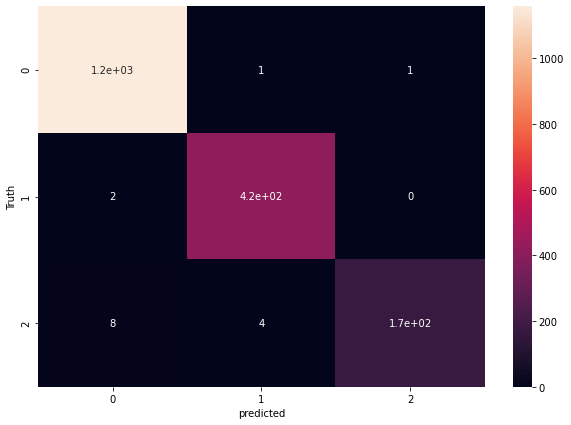

In [63]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [74]:
from sklearn.metrics import roc_curve, auc

xgboost_fpr, xgboost_tpr, threshold = roc_curve(y_test, y_pred)

auc_xgboost = auc(xgboost_fpr, xgboost_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(xgboost_fpr, xgboost_tpr, linestyle = '-', label='xgboost (auc = %0.3f)' % auc_xgboost)
plt.show()

ValueError: multiclass format is not supported

In [77]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
auc = roc_auc_score(y_test, y_pred, multi_class="ovo")



AxisError: axis 1 is out of bounds for array of dimension 1

In [68]:
import sklearn

sklearn.__version__

'0.23.2'

In [71]:
from sklearn.metrics import roc_auc_score

In [72]:
 roc_auc_score(y_test, y_pred, multi_class="ovr")

AxisError: axis 1 is out of bounds for array of dimension 1